In [1]:
import pandas as pd
from utils.myutils import Utils

utils = Utils()
import json
import seaborn as sns
import matplotlib.pyplot as plt

2023-12-09 02:30:08.260260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 02:30:08.301235: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
df_base_normal = pd.read_json(
    "experiments/complete/gplvm/000_gplvm_normal_03_best.json"
)

In [3]:
df_base_contaminated = pd.read_json(
    "experiments/complete/gplvm/001_gplvm_contaminated.json"
)

In [51]:
df_base_normal[["training_time"]].sort_values("training_time")

,training_time
38,11.350732
3,11.774656
46,12.163990
36,12.174701
28,12.245080
44,12.775501
13,13.307483
41,13.320652
17,13.569980
39,13.784721


In [4]:
df_base_normal[["test_ratio"]] = df_base_normal[["pct_anomaly"]] / 100
df_base_normal[["train_ratio"]] = df_base_normal[["pct_anomaly"]] / 100
df_base_normal[["labeled_anomalies"]] = 1.0
df_base_normal[["method"]] = "ground_truth"

In [5]:
df_base_contaminated[["test_ratio"]] = df_base_contaminated[["pct_anomaly"]] / 100
df_base_contaminated[["train_ratio"]] = df_base_contaminated[["pct_anomaly"]] / 100
df_base_contaminated[["labeled_anomalies"]] = 0
df_base_contaminated[["method"]] = "blind"

# Epochs

In [6]:
df_epochs_0100 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_100.json"
)
df_epochs_1000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_1000.json"
)
df_epochs_5000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_5000.json"
)
df_epochs_0100_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_100.json"
)
df_epochs_1000_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_1000.json"
)
df_epochs_5000_c = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_5000.json"
)

In [36]:
df_loe = utils.read_json_from_folder("experiments/complete/loe/")

In [37]:
df_soft_50 = df_loe[ (df_loe.method == "soft") & (df_loe.labeled_anomalies == 1.00)]
df_refine_50 = df_loe[ (df_loe.method == "refine") & (df_loe.labeled_anomalies ==  1.00)]

In [47]:
comparative = pd.concat([df_epochs_1000, df_soft_50[["dataset","aucroc"]].reset_index()], axis = 1)
comparative

,GPLVM,index,dataset,aucroc
0,0.516929,5,01_ALOI,0.515684
1,0.704775,21,02_annthyroid,0.689898
2,0.830173,37,03_backdoor,0.778855
3,0.991078,53,04_breastw,0.982446
4,0.732236,69,05_campaign,0.724794
5,0.961581,85,06_cardio,0.946259
6,0.754690,101,07_Cardiotocography,0.595039
7,0.824045,117,08_celeba,0.838102
8,0.664663,133,09_census,0.660086
9,0.942754,149,10_cover,0.922826


,GPLVM,index,dataset,aucroc
0,0.516929,5,01_ALOI,0.515684
1,0.704775,21,02_annthyroid,0.689898
2,0.830173,37,03_backdoor,0.778855
3,0.991078,53,04_breastw,0.982446
4,0.732236,69,05_campaign,0.724794


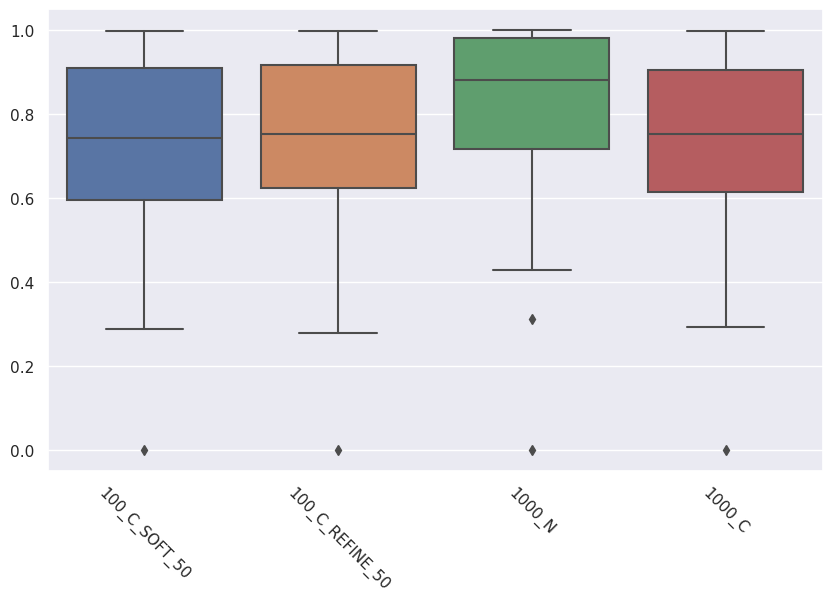

In [29]:
sns.set(rc={'figure.figsize':(10,6)})

s = sns.boxplot(
    pd.concat(
        [
            #df_epochs_0100.rename(columns={"GPLVM": "100_N"}),
            #df_epochs_0100_c.rename(columns={"GPLVM": "100_C"}),
            df_soft_50[["aucroc"]].rename(columns={"aucroc": "100_C_SOFT_50"}),
            df_refine_50[["aucroc"]].rename(columns={"aucroc": "100_C_REFINE_50"}),
            df_epochs_1000.rename(columns={"GPLVM": "1000_N"}),
            #df_base_normal[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_N0"}),
            df_epochs_1000_c.rename(columns={"GPLVM": "1000_C"}),
            #df_base_contaminated[["test_auc_roc"]].rename(columns={"test_auc_roc": "1000_C0"}),
            #df_epochs_5000.rename(columns={"GPLVM": "5000_N"}),
            #df_epochs_5000_c.rename(columns={"GPLVM": "5000_C"}),
        ],
        axis=1,
    )
)
plt.xticks(rotation=-45)
None